# Tech Compensation Analysis
### Analysis & Salary Prediction in the the Data Science Job Market
### Objective:
This project analyzes 9355 tech job records to identify key drivers of compensation and build an understandable salary prediction model.

## 1. Data Loading & Initial Audit

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\munzi\Desktop\Portfolio\job-market-project\data\ds_salaries.csv")

print(df.shape)
df.head() 

(9355, 12)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### Dataset Structure & Summary Statistics

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [3]:
usd_salary = df["salary_in_usd"]
usd_salary.describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

## 2. Data Cleaning & Outlier Treatment

In [ ]:
usd_salary = df["salary_in_usd"]
low = usd_salary.quantile(0.01) #1st Percentile
high = usd_salary.quantile(0.99) #99th Percentile

df["salary_capped"] = (usd_salary.clip(lower=low ,upper=high))
df["salary_capped"].describe()

C:\Users\munzi\AppData\Local\Temp\ipykernel_18156\3323528116.py:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["salary_capped"] = (usd_salary.clip(lower=low ,upper=high).astype(int))


count      9355.000000
mean     150097.825013
std       61968.935344
min       36000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      328906.000000
Name: salary_capped, dtype: float64

## 3. Target Transformation (Log Salary)

In [5]:
import numpy as np

salary_cap = df["salary_capped"]
df["log_salary"] = np.log(salary_cap)

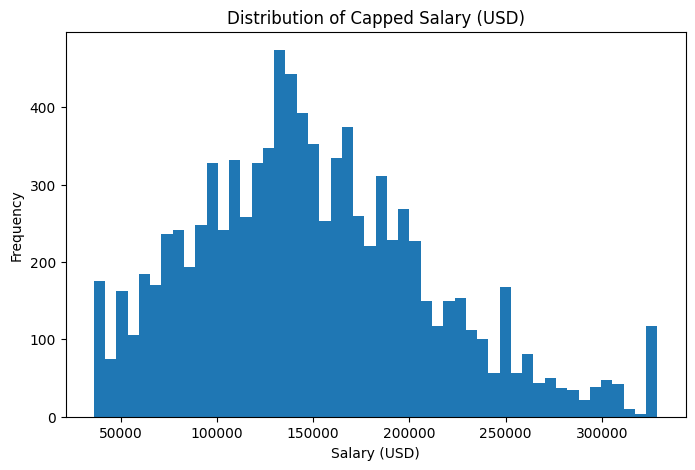

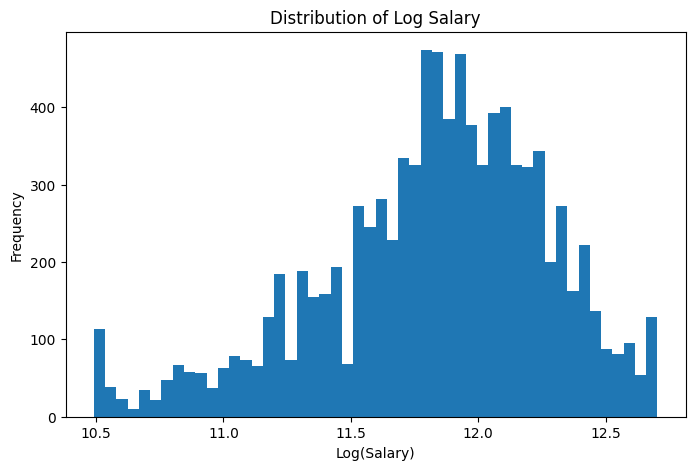

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["salary_capped"], bins=50)
plt.title("Distribution of Capped Salary (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df["log_salary"], bins=50)
plt.title("Distribution of Log Salary")
plt.xlabel("Log(Salary)")
plt.ylabel("Frequency")
plt.show()